In [19]:
import numpy as np
import matplotlib.pyplot as plt


def generate_4pam_signal(bits):
    #Mapeamento bit a símbolo 4-PAM
    symbol_map = {'00': -3, '01': -1, '10': 1, '11': 3}
    symbols=np.array([])
    # Converter bits em símbolos
    for i in range(0, len(bits), 2):
      b = bits[i:i+2]
      #print(b)
      symbol = symbol_map[b]
      #print(symbol)
      symbols = np.append(symbols, symbol)

    return symbols
#print(symbols)

In [20]:
# Exemplo de uso
bits = "0010101110010010"  # Exemplo de sequência de bits
symbols = generate_4pam_signal(bits)
print(symbols)

[-3.  1.  1.  3.  1. -1. -3.  1.]


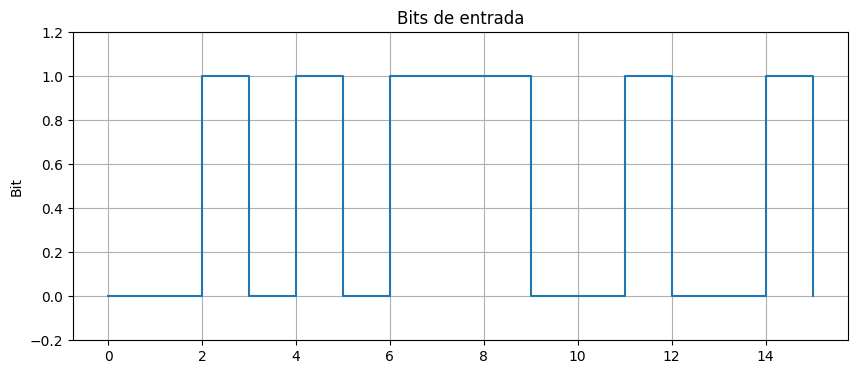

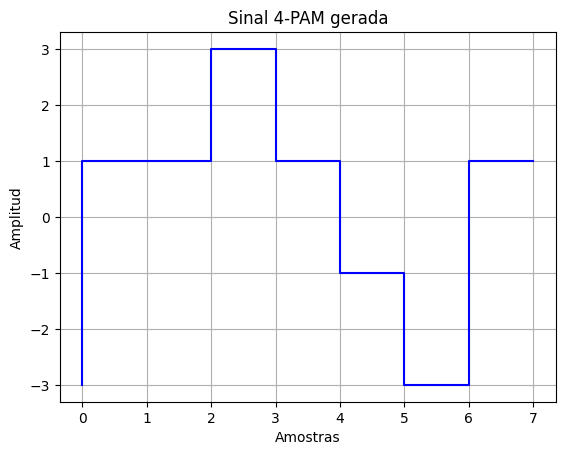

In [22]:
# Geração de gráficos

# Convertemos a string de bits em inteiros
B = [int(bit) for bit in bits]
#print(B)
# Criamos uma matriz de índices para o eixo x
indices = range(len(B))

# Plot Bits
plt.figure(figsize=(10,4))
plt.step(indices, B, where='post')
plt.ylim([-0.2, 1.2])
plt.ylabel('Bit')
plt.title('Bits de entrada')
plt.grid(True)
plt.show()

# Plot Sinal 4 PAM
t = np.linspace(0, 8, 8, endpoint=False)
plt.plot(t, symbols,'b-', drawstyle='steps-pre')
plt.title("Sinal 4-PAM gerada")
plt.xlabel("Amostras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

Demodulação sem ruído

In [23]:
def demodulate_4pam_signal(symbols):
    # Mapeamento inverso de símbolos para bits
    symbol_map_inverse = {-3: '00', -1: '01', 1: '10', 3: '11'}

    # Demodulação de símbolos
    bits = ""
    for symbol in symbols:
        # Encontre o símbolo mais próximo
        closest_symbol = min(symbol_map_inverse.keys(), key=lambda x: abs(x - symbol))
        # Converta o símbolo para o bit correspondente
        bits += symbol_map_inverse[closest_symbol]

    return bits

In [24]:
# Exemplo de uso
received_bits = demodulate_4pam_signal(symbols)

print("Bits recibidos después de demodulación:", received_bits)

Bits recibidos después de demodulación: 0010101110010010


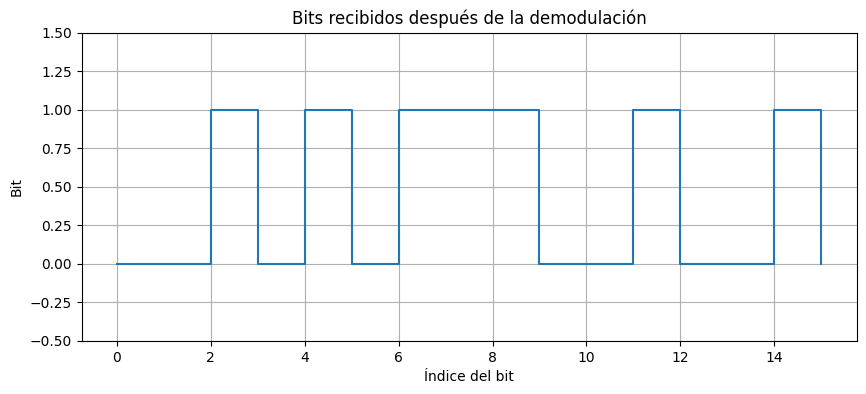

In [25]:
# Convertemos a string de bits em inteiros
bit_list = [int(bit) for bit in received_bits]

# Criamos uma matriz de índices para o eixo x
indices = range(len(bit_list))

# Plot
plt.figure(figsize=(10,4))
plt.step(indices, bit_list, where='post')
plt.ylim([-0.5, 1.5])
plt.ylabel('Bit')
plt.title('Bits recebidos após demodulação')
plt.grid(True)
plt.show()

Demodulação com ruído

In [26]:
def add_noise(signal, noise_variance):
    noise = np.random.normal(0, np.sqrt(noise_variance), len(signal))
    return signal + noise

def demodulate_4pam_signal(symbols, noise_variance):
    # Mapeamento inverso de símbolos para bits
    symbol_map_inverse = {-3: '00', -1: '01', 1: '10', 3: '11'}

    # Adicionando ruído aos símbolos
    symbols_noisy = add_noise(symbols, noise_variance)

    # Demodulação de símbolos
    bits = ""
    for symbol in symbols_noisy:
        # Encontre o símbolo mais próximo na ausência de ruído
        closest_symbol = min(symbol_map_inverse.keys(), key=lambda x: abs(x - symbol))
        # Converta o símbolo para o bit correspondente
        bits += symbol_map_inverse[closest_symbol]

    return bits

# Exemplo de uso
noise_variance = 0.5  # Variação de ruído
received_bits = demodulate_4pam_signal(symbols, noise_variance)
print("Bits recibidos después de demodulación con ruido:", received_bits)


Bits recibidos después de demodulación con ruido: 0010101110010010


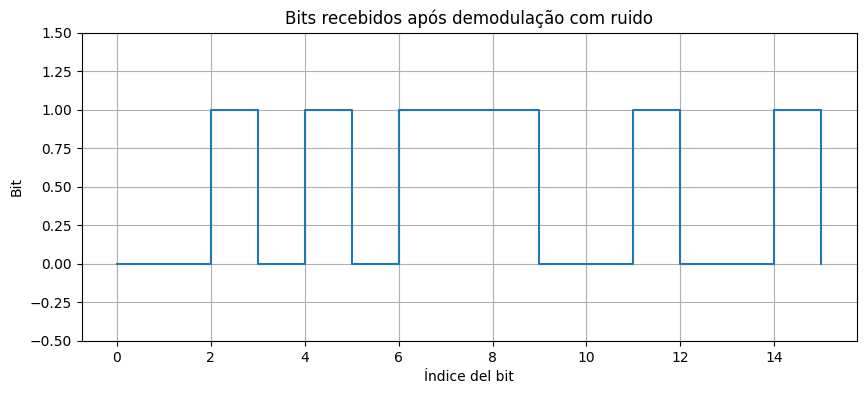

In [30]:
# Convertemos a string de bits em inteiros
bit_list = [int(bit) for bit in received_bits]

# Criamos uma matriz de índices para o eixo x
indices = range(len(bit_list))

# Plot
plt.figure(figsize=(10,4))
plt.step(indices, bit_list, where='post')
plt.ylim([-0.5, 1.5])
plt.xlabel('Índice del bit')
plt.ylabel('Bit')
plt.title('Bits recebidos após demodulação com ruido')
plt.grid(True)
plt.show()